# **Module 6 - SNA Basics**

For this project, I chose a covert network csv pertaining to czech corruption. This 16 x 16 matrix contains values representing the number of co-appearances of each person in the Czech media rated on a scale of 0 to 10. The matrix contains individuals prominent in the Czech media and government from June 2013 and June 2014. These individuals range from official government officials like the prime minister, party officials, and espionage agents to unofficial actors related to and acting in some way to influence the government.

**Importing Libraries and Data**

In [1]:
#importing libraries
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#reading in the matrix csv into a dataframe
df = pd.read_csv('CZECH_CORRUPTION.csv')

In [3]:
#as per the csv's documentation: co-appearances = ties, for the 0 and 10 level, indicate the weakest / strongest ties.
#all other levels were given based on the number of co-appearances divided by 10, if the number was relatively close to zero, the pair were given a zero.
#thus, a zero does not necessarily constitute no relationship / no co-appearance.
df.head()

,Unnamed: 0,Jana_Nagyova,Ivan_Fuksa,Petr_Tluchor,Marek_Snajdr,Ondrej_Palenik,Roman_Bocek,Jan_Pohunek,Milan_Kovanda,Lubomir_Poul,Petr_Necas,Ivo_Rittig,Roman_Janousek,Libor_Grygarek,Vaclav_Ryba,Tomas_Hrdlicka,Jiri_Toman
0,Jana_Nagyova,0,5,3,4,2,3,2,3,1,10,2,3,0,0,1,0
1,Ivan_Fuksa,5,0,4,6,1,3,1,2,0,5,0,1,0,0,0,0
2,Petr_Tluchor,3,4,0,4,1,2,1,1,0,3,0,1,0,0,0,0
3,Marek_Snajdr,4,6,4,0,1,3,1,2,0,5,0,1,0,0,0,0
4,Ondrej_Palenik,2,1,1,1,0,1,1,1,0,1,0,0,0,0,0,0


**Cleaning the Data**

In [4]:
#checking if index matches the columns
print(df.index.values)
print(df.columns.values)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
['Unnamed: 0' 'Jana_Nagyova' 'Ivan_Fuksa' 'Petr_Tluchor' 'Marek_Snajdr'
 'Ondrej_Palenik' 'Roman_Bocek' 'Jan_Pohunek' 'Milan_Kovanda'
 'Lubomir_Poul' 'Petr_Necas' 'Ivo_Rittig' 'Roman_Janousek'
 'Libor_Grygarek' 'Vaclav_Ryba' 'Tomas_Hrdlicka' 'Jiri_Toman']


In [5]:
#setting index to the values/names in the 'unnamed' column.
#needed to make sure the indexes match the names of each column instead of a numerical value so the csvs can be read in correctly, as I ran into a few errors without it.
df = df.set_index('Unnamed: 0')

Upon examining the dataset, I saw that the index and columns names did not match up. While this wouldn't normally be an issue, the mismatched labels with cause an error when created the networkx graph. To remedy this, I set the index to the 'Unnamed: 0' column with correctly aligns with the columns.

**Exploring the Data**

Next, let's look at the spread of the data.

In [6]:
#investigating the highest and lowest co-appearance score within the dataframe.
print(f'The maximum value in the dataframe was {df.values.max()}.')
print(f'The minimum value in the dataframe was {df.values.min()}.')

The maximum value in the dataframe was 10.
The minimum value in the dataframe was 0.


0     0.583333
1     0.200000
2     0.066667
3     0.083333
4     0.025000
5     0.025000
6     0.008333
10    0.008333
Name: proportion, dtype: float64


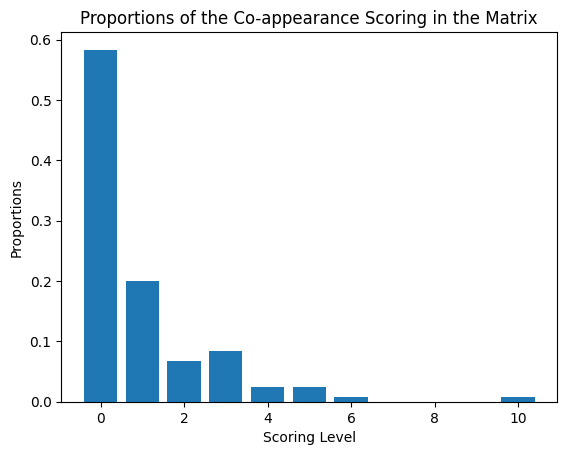

In [7]:
#getting the proportions of the matrix
proportions = []
for indexperson in df.index:
  for columnperson in df.columns:
    #skipping the pairings of the same individual.
    if indexperson == columnperson:
        continue
    else:
        appearance_value = df.loc[indexperson, columnperson]
        proportions.append(appearance_value)
#converting the proportions list to a series to be able to use value counts to get the proportions of the dataframe/matrix
proportionsseries = pd.Series(proportions)
proportionscount = proportionsseries.value_counts(normalize=True).sort_index()
print(proportionscount)

#plotting the proportions
plt.bar(proportionscount.index, proportionscount)
plt.title('Proportions of the Co-appearance Scoring in the Matrix')
plt.xlabel('Scoring Level')
plt.ylabel('Proportions')
plt.show()

Based on the proportions present in the matrix, we can see that the data appears to be rightly skewed. Where the majority of the data, nearly 58%, falls into the zero level for co-appearance scoring. Additionally, there were two levels, 7 and 8, notably absent from the matrix.
As per the csv's documentation, the data collector would transform the co-appearance ties by dividing the number of co-appearances by the maximum. Thus, if a pairings co-appearances fell under a small percentage like 3% compared to the max, it was given a zero level (UCINET Software, 2016).

Next, I wanted to examine the pairings which contained the strongest versus weakest tie.

In [8]:
#creating a loop to find out the pairs of people that contain the highest co-appearance scores.
#used 'df.index' as I set the new index to the 'Unnamed: 0' column.
#using a list to attempt to avoid printing duplicates as the matrix contains duplicates of each pairing.
pairtrack = []
for indexperson in df.index:
  for columnperson in df.columns:
    #used .loc to get the value in for each person in the index and the given column.
    appearance_value = df.loc[indexperson, columnperson]
    #trying to avoid instances of when a person is compared to themselves.
    if indexperson == columnperson:
        continue
    #filtering out the pairs that have the highest scoring level present.
    if appearance_value == 10:
      #created the variable 'current pair' using a sorted tuple to have the loop check for duplicates and avoid printing them twice regardless of name order.
      currentpair = tuple(sorted((indexperson, columnperson)))
      if currentpair not in pairtrack:
        pairtrack.append(currentpair)
        print(f"Strong co-appearance scores were seen between {indexperson} and {columnperson} with a value of {appearance_value}.")

Strong co-appearance scores were seen between Jana_Nagyova and Petr_Necas with a value of 10.


In [9]:
#used the following to lines to print bolded text in print lines, using the ANSI documentation.
BOLD = '\033[1m'
END = '\033[0m'
#creating a loop to find out the pairs of people that contain the lowest co-appearance scores.
#used 'df.index' as I set the new index to the 'Unnamed: 0' column.
#using a list to attempt to avoid printing duplicates as the matrix contains duplicates of each pairing.
weakpairtrack = []
weakpairs = []
print('Weak relationships (with a 0 level) were seen between:')
for indexperson in df.index:
  for columnperson in df.columns:
    relationship_value = df.loc[indexperson, columnperson]
    if indexperson == columnperson:
      continue
    if relationship_value == 0:
      #created the variable 'current pair' using a sorted tuple to have the loop check for duplicates and avoid printing them twice regardless of name order.
      currentpair = tuple(sorted((indexperson, columnperson)))
      if currentpair not in weakpairtrack:
        #appending the weak pairs without duplicates.
        weakpairtrack.append(currentpair)
        print(f"{indexperson} and {columnperson}") #prints a large list of all pairs with a level of 0.
        weakpairs.append((columnperson, indexperson))
print(f"{BOLD}There are {len(weakpairs)} pairs total that have a scoring level of 0 in this dataframe.{END}")

Weak relationships (with a 0 level) were seen between:
Jana_Nagyova and Libor_Grygarek
Jana_Nagyova and Vaclav_Ryba
Jana_Nagyova and Jiri_Toman
Ivan_Fuksa and Lubomir_Poul
Ivan_Fuksa and Ivo_Rittig
Ivan_Fuksa and Libor_Grygarek
Ivan_Fuksa and Vaclav_Ryba
Ivan_Fuksa and Tomas_Hrdlicka
Ivan_Fuksa and Jiri_Toman
Petr_Tluchor and Lubomir_Poul
Petr_Tluchor and Ivo_Rittig
Petr_Tluchor and Libor_Grygarek
Petr_Tluchor and Vaclav_Ryba
Petr_Tluchor and Tomas_Hrdlicka
Petr_Tluchor and Jiri_Toman
Marek_Snajdr and Lubomir_Poul
Marek_Snajdr and Ivo_Rittig
Marek_Snajdr and Libor_Grygarek
Marek_Snajdr and Vaclav_Ryba
Marek_Snajdr and Tomas_Hrdlicka
Marek_Snajdr and Jiri_Toman
Ondrej_Palenik and Lubomir_Poul
Ondrej_Palenik and Ivo_Rittig
Ondrej_Palenik and Roman_Janousek
Ondrej_Palenik and Libor_Grygarek
Ondrej_Palenik and Vaclav_Ryba
Ondrej_Palenik and Tomas_Hrdlicka
Ondrej_Palenik and Jiri_Toman
Roman_Bocek and Lubomir_Poul
Roman_Bocek and Ivo_Rittig
Roman_Bocek and Roman_Janousek
Roman_Bocek and Lib

There was one pairing with the strongest tie, level 10, which was Jana Nagyova and Petr Necas. Based on further exploration of who these individuals are, this pairing was expected to be high as Jana served as Petr's, the former Czech prime minister's chief of staff and later romantic partner.

As far as the weak pairings were concerned, there were 70 unique pairings that had a co-appearance level of zero. While this number is high it important to note that number of the pairings contained individuals such as Ivo Rittig, Roman Janoušek, Václav Ryba, Tomáš Hrdlička, Jiří Toman who are documented as not containing a defined role in the Czech government during this time.

**Creating the Networkx Graph**

In [10]:
#creating 'czech' to store networkx graph
czech = nx.from_pandas_adjacency(df)

In [11]:
#nx.info was depreciated, manually printed the info lines!
print(czech)
print('Number of Nodes:', len(czech.nodes))
print('Number of Edges:', len(czech.edges))
print('Average Degree:', sum(dict(czech.degree).values())/len(czech.nodes))

Graph with 16 nodes and 50 edges
Number of Nodes: 16
Number of Edges: 50
Average Degree: 6.25


In [12]:
#looking into the edges present.
print(czech.edges)

[('Jana_Nagyova', 'Ivan_Fuksa'), ('Jana_Nagyova', 'Petr_Tluchor'), ('Jana_Nagyova', 'Marek_Snajdr'), ('Jana_Nagyova', 'Ondrej_Palenik'), ('Jana_Nagyova', 'Roman_Bocek'), ('Jana_Nagyova', 'Jan_Pohunek'), ('Jana_Nagyova', 'Milan_Kovanda'), ('Jana_Nagyova', 'Lubomir_Poul'), ('Jana_Nagyova', 'Petr_Necas'), ('Jana_Nagyova', 'Ivo_Rittig'), ('Jana_Nagyova', 'Roman_Janousek'), ('Jana_Nagyova', 'Tomas_Hrdlicka'), ('Ivan_Fuksa', 'Petr_Tluchor'), ('Ivan_Fuksa', 'Marek_Snajdr'), ('Ivan_Fuksa', 'Ondrej_Palenik'), ('Ivan_Fuksa', 'Roman_Bocek'), ('Ivan_Fuksa', 'Jan_Pohunek'), ('Ivan_Fuksa', 'Milan_Kovanda'), ('Ivan_Fuksa', 'Petr_Necas'), ('Ivan_Fuksa', 'Roman_Janousek'), ('Petr_Tluchor', 'Marek_Snajdr'), ('Petr_Tluchor', 'Ondrej_Palenik'), ('Petr_Tluchor', 'Roman_Bocek'), ('Petr_Tluchor', 'Jan_Pohunek'), ('Petr_Tluchor', 'Milan_Kovanda'), ('Petr_Tluchor', 'Petr_Necas'), ('Petr_Tluchor', 'Roman_Janousek'), ('Marek_Snajdr', 'Ondrej_Palenik'), ('Marek_Snajdr', 'Roman_Bocek'), ('Marek_Snajdr', 'Jan_Pohun

Based on the networkx info summary, there are 16 unique nodes, corresponding to the 16 individuals present in the matrix. Additionally, there are 50 edges or ties present, as well. With an average of about 6 connections to each node.

Note: The networkx graph did not include pairings that were valued at zero.

In [13]:
#shortest path between nodes
nx.betweenness_centrality(czech)

{'Jana_Nagyova': 0.10952380952380954,
 'Ivan_Fuksa': 0.004761904761904762,
 'Petr_Tluchor': 0.004761904761904762,
 'Marek_Snajdr': 0.004761904761904762,
 'Ondrej_Palenik': 0.0,
 'Roman_Bocek': 0.0,
 'Jan_Pohunek': 0.0,
 'Milan_Kovanda': 0.004761904761904762,
 'Lubomir_Poul': 0.0,
 'Petr_Necas': 0.10952380952380954,
 'Ivo_Rittig': 0.0,
 'Roman_Janousek': 0.028571428571428574,
 'Libor_Grygarek': 0.0,
 'Vaclav_Ryba': 0.0,
 'Tomas_Hrdlicka': 0.0,
 'Jiri_Toman': 0.0}

In [14]:
#direct connections with each node, node importance in the network
nx.degree_centrality(czech)

{'Jana_Nagyova': 0.8,
 'Ivan_Fuksa': 0.6,
 'Petr_Tluchor': 0.6,
 'Marek_Snajdr': 0.6,
 'Ondrej_Palenik': 0.5333333333333333,
 'Roman_Bocek': 0.5333333333333333,
 'Jan_Pohunek': 0.5333333333333333,
 'Milan_Kovanda': 0.6,
 'Lubomir_Poul': 0.13333333333333333,
 'Petr_Necas': 0.8,
 'Ivo_Rittig': 0.2,
 'Roman_Janousek': 0.5333333333333333,
 'Libor_Grygarek': 0.0,
 'Vaclav_Ryba': 0.0,
 'Tomas_Hrdlicka': 0.2,
 'Jiri_Toman': 0.0}

In [15]:
#how many pathways lead to this person in total (influence)
nx.eigenvector_centrality(czech)

{'Jana_Nagyova': 0.3491393403774903,
 'Ivan_Fuksa': 0.31861409204821867,
 'Petr_Tluchor': 0.31861409204821867,
 'Marek_Snajdr': 0.31861409204821867,
 'Ondrej_Palenik': 0.29286532292849465,
 'Roman_Bocek': 0.29286532292849465,
 'Jan_Pohunek': 0.29286532292849465,
 'Milan_Kovanda': 0.31861409204821867,
 'Lubomir_Poul': 0.07993181924550158,
 'Petr_Necas': 0.34913934037749034,
 'Ivo_Rittig': 0.10862813233066473,
 'Roman_Janousek': 0.25068736162294303,
 'Libor_Grygarek': 3.844422068647915e-11,
 'Vaclav_Ryba': 3.844422068647915e-11,
 'Tomas_Hrdlicka': 0.10862813233066473,
 'Jiri_Toman': 3.844422068647915e-11}

According to the eigenvector_centrality and the betweeness centrality measure, Jana Nagyova and Petr Necas have the highest amount of influence on the network, followed by the high ranking government officials. This finding is supported as they are the highest ranking officials in this matrix. Whereas Toman, Grygarek and Ryba have a very low value for eigenvector_centrality perhaps indicating these nodes have little to no influence on the larger network.

While the eigenvestor_centrality gets at how much influence a node has, I further broadened by examination of the weak links in degree_centrality. At the current moment, the network appears to contain many nodes that fall around or below 50% in terms of node connections. Falling above this metric was the Jana Nagyova and Petr Necas nodes which contained about 80% of the connections in the network. Whereas Toman, Grygarek and Ryba appear to be outliers and do not have any connection to this network.

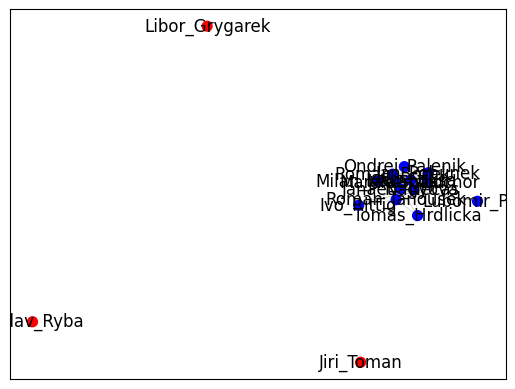

In [16]:
#plt.figure(figsize=(30,30))
outliercolor = ['red' if node in ('Libor_Grygarek', 'Jiri_Toman', 'Vaclav_Ryba') else 'blue' for node in czech]
options ={
    'node_color': outliercolor,
    'node_size': 50,
    'width':0.1,
}
#nx.spring_layout(czech)
nx.draw_networkx(czech, **options)

The network visualization seemingly confirms my previous observations that of the nodes in red, Grygarek, Toman and Ryba being the weakest link as they have no edges linking them to other individuals.

**Removing Outliers / Weakest Links**

Next, I will remove the weakest links and re-run the network statistics and graph.

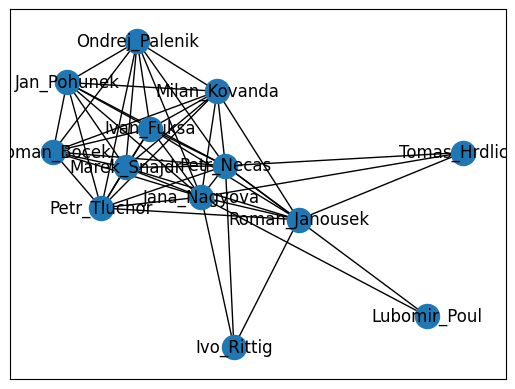

In [17]:
#removing the three people that have no impact on the network, no co-appearance ties to any other
czech.remove_node('Libor_Grygarek')
czech.remove_node('Jiri_Toman')
czech.remove_node('Vaclav_Ryba')

nx.draw_networkx(czech)

In [18]:
#shortest path between nodes
nx.betweenness_centrality(czech)

{'Jana_Nagyova': 0.17424242424242425,
 'Ivan_Fuksa': 0.007575757575757576,
 'Petr_Tluchor': 0.007575757575757576,
 'Marek_Snajdr': 0.007575757575757576,
 'Ondrej_Palenik': 0.0,
 'Roman_Bocek': 0.0,
 'Jan_Pohunek': 0.0,
 'Milan_Kovanda': 0.007575757575757576,
 'Lubomir_Poul': 0.0,
 'Petr_Necas': 0.17424242424242425,
 'Ivo_Rittig': 0.0,
 'Roman_Janousek': 0.045454545454545456,
 'Tomas_Hrdlicka': 0.0}

In [19]:
#how many pathways lead to this person in total
nx.eigenvector_centrality(czech)

{'Jana_Nagyova': 0.3491390176079235,
 'Ivan_Fuksa': 0.3186142593205418,
 'Petr_Tluchor': 0.3186142593205418,
 'Marek_Snajdr': 0.3186142593205418,
 'Ondrej_Palenik': 0.2928656794358896,
 'Roman_Bocek': 0.2928656794358896,
 'Jan_Pohunek': 0.2928656794358896,
 'Milan_Kovanda': 0.3186142593205418,
 'Lubomir_Poul': 0.07993149354085244,
 'Petr_Necas': 0.3491390176079235,
 'Ivo_Rittig': 0.1086275267996388,
 'Roman_Janousek': 0.25068678945412864,
 'Tomas_Hrdlicka': 0.1086275267996388}

In [20]:
#strength of links / connections
nx.degree_centrality(czech)

{'Jana_Nagyova': 1.0,
 'Ivan_Fuksa': 0.75,
 'Petr_Tluchor': 0.75,
 'Marek_Snajdr': 0.75,
 'Ondrej_Palenik': 0.6666666666666666,
 'Roman_Bocek': 0.6666666666666666,
 'Jan_Pohunek': 0.6666666666666666,
 'Milan_Kovanda': 0.75,
 'Lubomir_Poul': 0.16666666666666666,
 'Petr_Necas': 1.0,
 'Ivo_Rittig': 0.25,
 'Roman_Janousek': 0.6666666666666666,
 'Tomas_Hrdlicka': 0.25}

After removing those nodes, we can get a better look at the true network. Since these node did not have any ties to other nodes, there was no impact on the network in terms of de-stablizing other nodes. Instead, I observed that all the metrics (degree_centrality, eigenvector_centrality, and betweenness_centrality) increased, this is likely due to the metrics being derived from a smaller pool with three less nodes.

Additionally, I observed how Jana and Necas' values for degree centrality not only increased but they reached maximum level of centrality, meaning that the Jana and Necas nodes were connected to every other individual in the network. Followed by the Fuksa, Tluchor, Snajdr and Rittig nodes being connected to 75% of the other nodes present in this network.

**Removing Weak Links with Connections to the Network**

Based on the the degree_centrality above, I observed that 'Lubomir Poul', 'Tomas Hrdlicka' and 'Ivo Rittig' were now the weakest links in the network.

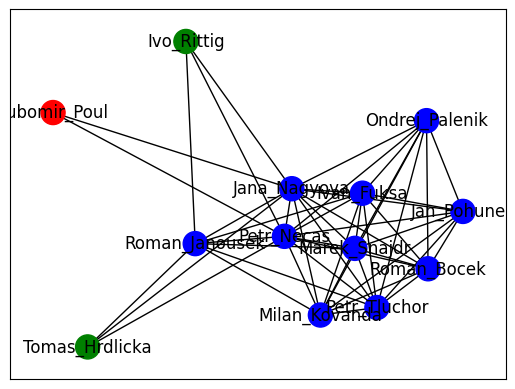

In [21]:
#plotting the newly filtered network highlighting the weak links, red being the weakest followed green nodes being the next weakest.
#Poul is the weakest link, followed by Ritting and Hrdlicka.
outliercolor = ['red' if node == 'Lubomir_Poul' else ('green' if node in ('Ivo_Rittig', 'Tomas_Hrdlicka') else 'blue') for node in czech]
options ={
    'node_color': outliercolor,
}
#nx.spring_layout(czech)
nx.draw_networkx(czech, **options)

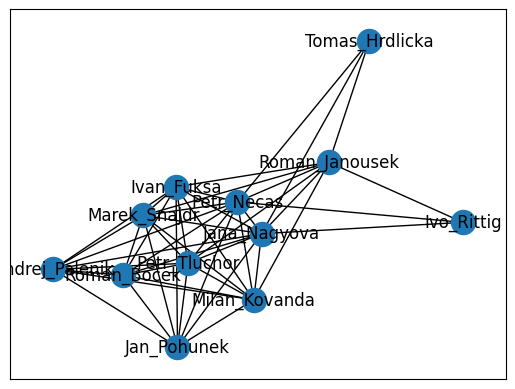

In [22]:
#removing Poul to see how that affects the network.
czech.remove_node('Lubomir_Poul')
nx.draw_networkx(czech)

In [23]:
#how many pathways lead to this person in total
nx.eigenvector_centrality(czech)

{'Jana_Nagyova': 0.34406002272378744,
 'Ivan_Fuksa': 0.3216747659686965,
 'Petr_Tluchor': 0.3216747659686965,
 'Marek_Snajdr': 0.3216747659686965,
 'Ondrej_Palenik': 0.29559644437359617,
 'Roman_Bocek': 0.29559644437359617,
 'Jan_Pohunek': 0.29559644437359617,
 'Milan_Kovanda': 0.3216747659686964,
 'Petr_Necas': 0.34406002272378733,
 'Ivo_Rittig': 0.1083520846302534,
 'Roman_Janousek': 0.25245724195627783,
 'Tomas_Hrdlicka': 0.1083520846302534}

In [24]:
#strength of links/ connectedness
nx.degree_centrality(czech)

{'Jana_Nagyova': 1.0,
 'Ivan_Fuksa': 0.8181818181818182,
 'Petr_Tluchor': 0.8181818181818182,
 'Marek_Snajdr': 0.8181818181818182,
 'Ondrej_Palenik': 0.7272727272727273,
 'Roman_Bocek': 0.7272727272727273,
 'Jan_Pohunek': 0.7272727272727273,
 'Milan_Kovanda': 0.8181818181818182,
 'Petr_Necas': 1.0,
 'Ivo_Rittig': 0.2727272727272727,
 'Roman_Janousek': 0.7272727272727273,
 'Tomas_Hrdlicka': 0.2727272727272727}

Upon removing Poul from the network pool, that node and some corresponding edges were removed. I observed similar occurences when removing the previous weak links where every metric increased.

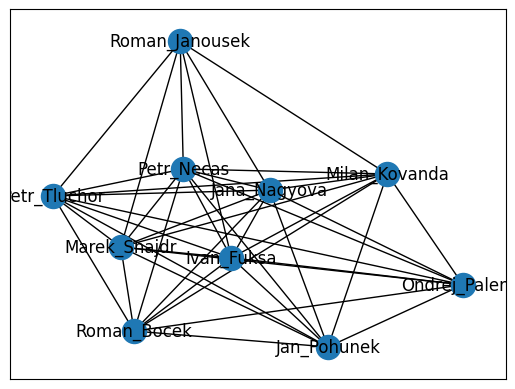

In [25]:
#removing the remaining weakest links to see how it impacts the network further.
czech.remove_node('Ivo_Rittig')
czech.remove_node('Tomas_Hrdlicka')
nx.draw_networkx(czech)

In [26]:
#looking into changes in the network after removing the weakest links.
print(czech)
print('Number of Nodes:', len(czech.nodes))
print('Number of Edges:', len(czech.edges))
print('Average Degree:', sum(dict(czech.degree).values())/len(czech.nodes))

Graph with 10 nodes and 42 edges
Number of Nodes: 10
Number of Edges: 42
Average Degree: 8.4


The newly updated networkx now contains fewer nodes and edges, 10 and 42 respectively, reflecting the puning of weak links with the new average degree being 8.4.

In [27]:
#how many pathways lead to this person in total
nx.eigenvector_centrality(czech)

{'Jana_Nagyova': 0.33205500649623315,
 'Ivan_Fuksa': 0.33205500649623315,
 'Petr_Tluchor': 0.33205500649623315,
 'Marek_Snajdr': 0.33205500649623315,
 'Ondrej_Palenik': 0.30729120078735067,
 'Roman_Bocek': 0.30729120078735067,
 'Jan_Pohunek': 0.30729120078735067,
 'Milan_Kovanda': 0.3320550064962332,
 'Petr_Necas': 0.3320550064962332,
 'Roman_Janousek': 0.23484716247109252}

In [28]:
#strength of links
nx.degree_centrality(czech)

{'Jana_Nagyova': 1.0,
 'Ivan_Fuksa': 1.0,
 'Petr_Tluchor': 1.0,
 'Marek_Snajdr': 1.0,
 'Ondrej_Palenik': 0.8888888888888888,
 'Roman_Bocek': 0.8888888888888888,
 'Jan_Pohunek': 0.8888888888888888,
 'Milan_Kovanda': 1.0,
 'Petr_Necas': 1.0,
 'Roman_Janousek': 0.6666666666666666}

Being that this covert network was undirected, as each node was removed the rest of the nodes pathway , influence, and relationship increases in importance as there were fewer and fewer nodes to draw on. Thankfully, the weakest links in this network did not destabilize the network in any immediate nor disastrous way. Which would likely not be the case in other networks, especially, in networks that contain directed data. In larger networks, while weaker nodes much like outliers may not have much influence, in directed networks these nodes could potential have a larger impact. This is especially true in case where a node may not have many connections, leaving it weak, however, it could perhaps be a bridge connecting two much larger nodes together. If a node like that were to be pruned, that could substantially reshape a network's connections and in severe cases potentially destablize a cluster or at worst an entire network.

Based on the nature of the dataset, with its primary focus being on the connections on two high ranking officials, it makes sense that unless one of the two individuals were to be removed then it would be unlikely to see any major disastrous changes to the network at this time, especially considering how intertwined the individuals are. The weakest nodes in this network were identified as Libor Grygarek, Jiri Toman, Vaclav Ryba which appeared to have no direct connections. Followed by Lubomir Poul, Ivo Rittig and Tomas Hrdlicka.